In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import warnings
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
import openTSNE

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("df_processed.csv")
df

sex  age  height  weight  waistline  sight_left  sight_right  \
0         1   35     170      75       90.0         1.0          1.0   
1         1   30     180      80       89.0         0.9          1.2   
2         1   40     165      75       91.0         1.2          1.5   
3         1   50     175      80       91.0         1.5          1.2   
4         1   50     165      60       80.0         1.0          1.2   
...     ...  ...     ...     ...        ...         ...          ...   
991315    1   45     175      80       92.1         1.5          1.5   
991316    1   35     170      75       86.0         1.0          1.5   
991317    0   40     155      50       68.0         1.0          0.7   
991318    1   25     175      60       72.0         1.5          1.0   
991319    1   50     160      70       90.5         1.0          1.5   

        hear_left  hear_right    SBP  ...  LDL_chole  triglyceride  \
0               0           0  120.0  ...        126          92.0   
1               0           0  130.0  ...        148         121.0   
2               0           0  120.0  ...         74         104.0   
3               0           0  145.0  ...        104         106.0   
4               0           0  138.0  ...        117         104.0   
...           ...         ...    ...  ...        ...           ...   
991315          0           0  114.0  ...        125         132.0   
991316          0           0  119.0  ...         84          45.0   
991317          0           0  110.0  ...         77         157.0   
991318          0           0  119.0  ...         73          53.0   
991319          0           0  133.0  ...        153         163.0   

        hemoglobin  urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  \
0             17.1              0               1.0      21.0      35.0   
1             15.8              0               0.9      20.0      36.0   
2             15.8              0               0.9      47.0      32.0   
3             17.6              0               1.1      29.0      34.0   
4             13.8              0               0.8      19.0      12.0   
...            ...            ...               ...       ...       ...   
991315        15.0              0               1.0      26.0      36.0   
991316        15.8              0               1.1      14.0      17.0   
991317        14.3              0               0.8      30.0      27.0   
991318        14.5              0               0.8      21.0      14.0   
991319        15.8              0               0.9      24.0      43.0   

        gamma_GTP  SMK_stat_type_cd  DRK_YN  
0            40.0                 0       1  
1            27.0                 2       0  
2            68.0                 0       0  
3            18.0                 0       0  
4            25.0                 0       0  
...           ...               ...     ...  
991315       27.0                 0       0  
991316       15.0                 0       0  
991317       17.0                 2       1  
991318       17.0                 0       0  
991319       36.0                 2       1  

[991320 rows x 24 columns]

## Shuffle dataset

In [5]:
df = df.sample(frac=1, random_state=69).reset_index(drop=True)
df

sex  age  height  weight  waistline  sight_left  sight_right  \
0         1   60     165      65       73.0         1.2          0.8   
1         1   35     170      75       93.1         1.5          1.2   
2         0   70     150      60       84.0         0.8          0.7   
3         0   60     145      60       84.0         1.0          1.2   
4         0   50     155      60       76.2         0.8          0.7   
...     ...  ...     ...     ...        ...         ...          ...   
991315    0   40     160      55       71.0         0.5          0.5   
991316    1   40     165      70       88.0         1.2          1.0   
991317    1   35     165      55       77.0         0.9          1.0   
991318    1   40     165      75       94.5         1.0          1.0   
991319    1   25     180      70       78.0         1.2          1.5   

        hear_left  hear_right    SBP  ...  LDL_chole  triglyceride  \
0               0           0  120.0  ...        133          47.0   
1               0           0  107.0  ...        127         110.0   
2               0           0  142.0  ...        102         119.0   
3               0           0  122.0  ...         83         230.0   
4               0           0  118.0  ...        122         230.0   
...           ...         ...    ...  ...        ...           ...   
991315          0           0  115.0  ...        135          82.0   
991316          0           0  110.0  ...        153         223.0   
991317          0           0  119.0  ...         79          59.0   
991318          0           1  128.0  ...         73         332.5   
991319          0           0  126.0  ...        105         100.0   

        hemoglobin  urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  \
0             15.6              0               0.6      35.0      31.0   
1             14.8              0               0.8      20.0      26.0   
2             13.3              0               0.8      22.0      17.0   
3             12.2              0               0.9      22.0      23.0   
4             14.3              0               0.7      17.0      13.0   
...            ...            ...               ...       ...       ...   
991315        11.9              0               0.5      19.0      16.0   
991316        14.1              0               1.1      17.0      27.0   
991317        15.5              0               0.8      20.0      16.0   
991318        17.4              0               0.8      43.0      40.0   
991319        14.7              1               1.2      12.0       9.0   

        gamma_GTP  SMK_stat_type_cd  DRK_YN  
0            15.0                 1       1  
1            14.0                 2       0  
2            26.0                 0       0  
3            40.5                 0       0  
4            15.0                 0       0  
...           ...               ...     ...  
991315       11.0                 0       0  
991316       92.0                 2       1  
991317       30.0                 2       1  
991318      103.5                 2       1  
991319       13.0                 0       1  

[991320 rows x 24 columns]

## Scaling

In [6]:
X_male = df.drop(columns=["DRK_YN", "SMK_stat_type_cd"])[df["sex"] == 1]
X_female = df.drop(columns=["DRK_YN", "SMK_stat_type_cd"])[df["sex"] == 0]
X = df.drop(columns=["DRK_YN", "SMK_stat_type_cd"])

scaler = StandardScaler()
X_male = scaler.fit_transform(X_male)
X_female = scaler.fit_transform(X_female)
X = scaler.fit_transform(X)

## Labels

In [7]:
sex = df["sex"].to_numpy()
flipped_sex = 1 - df["sex"].to_numpy()

SMK = df["SMK_stat_type_cd"].to_numpy()
SMK_subset_males = df[:200000][df["sex"] == 1]["SMK_stat_type_cd"].to_numpy()
SMK_subset_females = df[:200000][df["sex"] == 0]["SMK_stat_type_cd"].to_numpy()

DRK = df["DRK_YN"].to_numpy()
DRK_subset_males = df[:200000][df["sex"] == 1]["DRK_YN"].to_numpy()
DRK_subset_females = df[:200000][df["sex"] == 0]["DRK_YN"].to_numpy()

SMK_male = sex * SMK
SMK_female = flipped_sex * SMK

DRK_male = sex * DRK
DRK_female = flipped_sex * DRK

## Dimensionality reduction

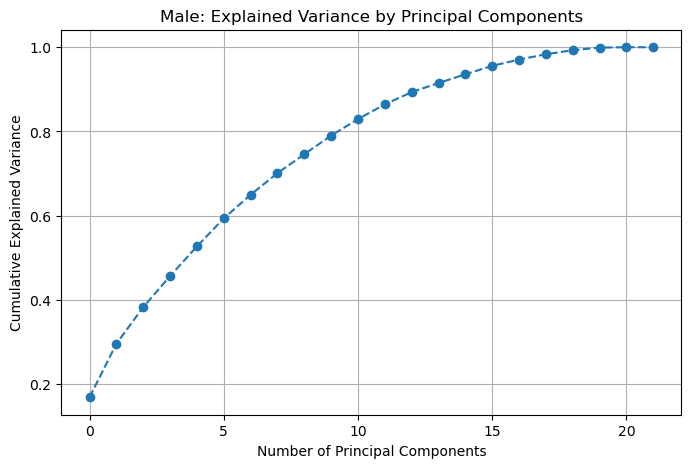

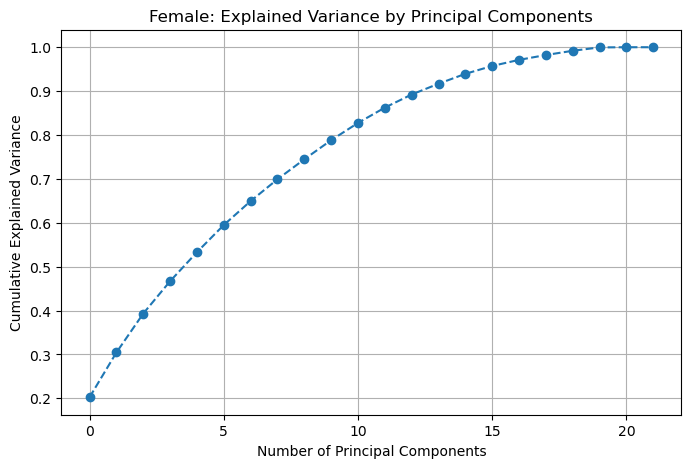

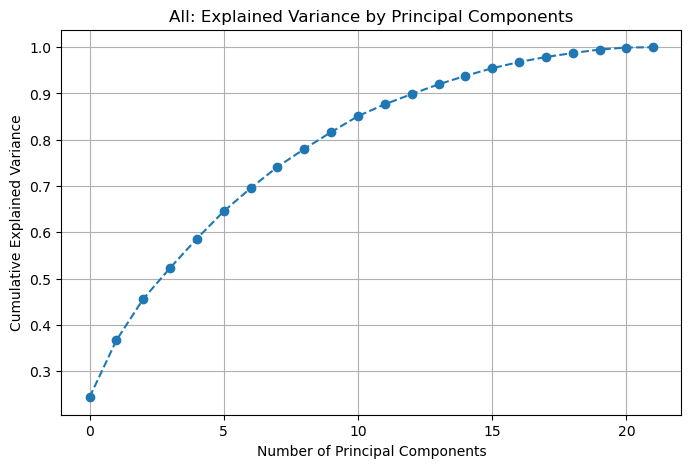

In [8]:
pca = PCA()
X_male_pca_test = pca.fit_transform(X_male)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Male: Explained Variance by Principal Components')
plt.grid(True)
plt.show()

X_female_pca_test = pca.fit_transform(X_female)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Female: Explained Variance by Principal Components')
plt.grid(True)
plt.show()

X_pca_test = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('All: Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# This where we actually create the reduced-dimensionality dataset

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

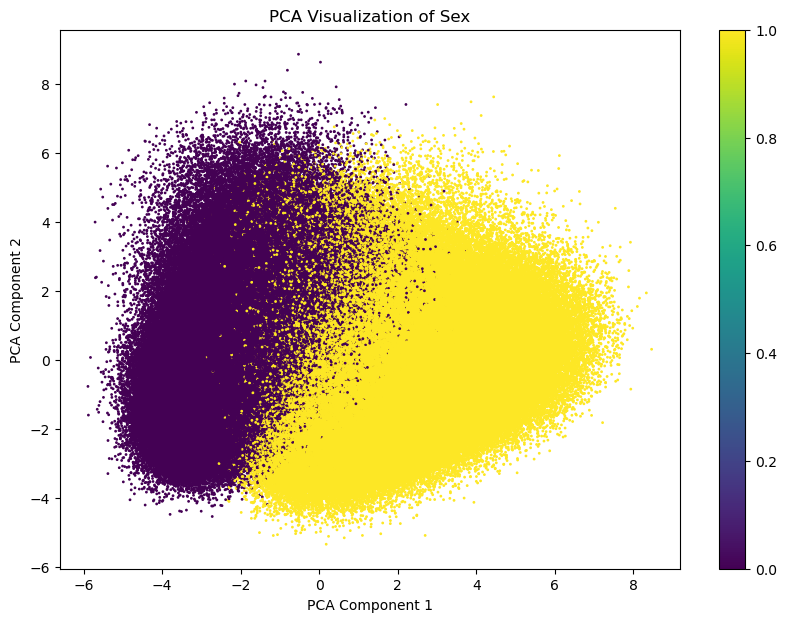

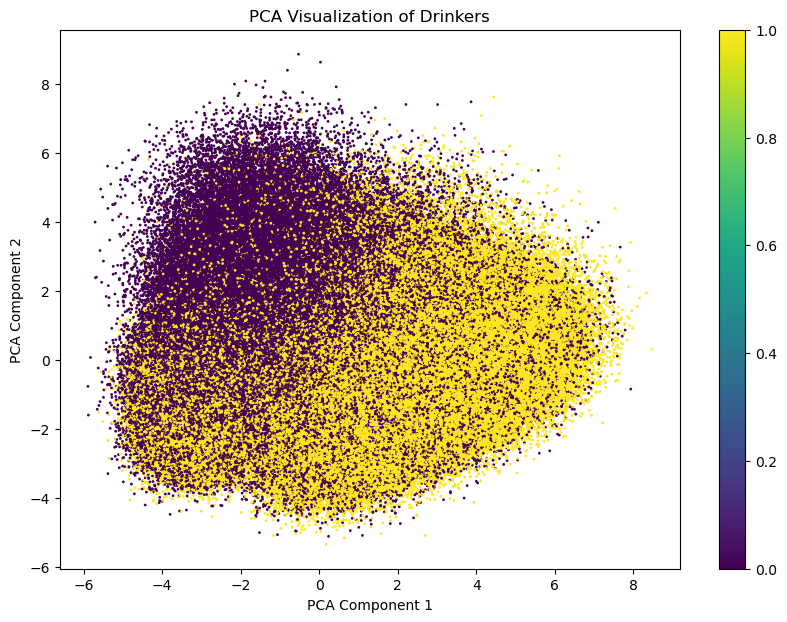

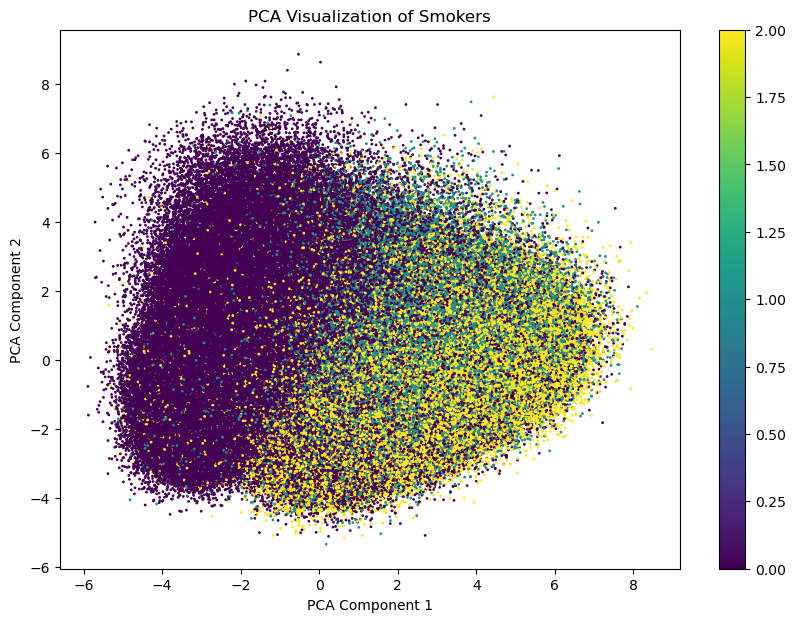

In [111]:
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=1, cmap='viridis', c=sex)
plt.title('PCA Visualization of Sex')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=1, cmap='viridis', c=DRK)
plt.title('PCA Visualization of Drinkers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=1, cmap='viridis', c=SMK)
plt.title('PCA Visualization of Smokers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

## t-SNE (only first 200 000 rows)

In [112]:
opentsne = openTSNE.TSNE(n_components=2, perplexity=30, n_iter=250, negative_gradient_method="fft", verbose=True)
X_opentsne = opentsne.fit(X[:200000])

X_opentsne_male = X_opentsne[sex[:200000] == 1]
X_opentsne_female = X_opentsne[sex[:200000] == 0]

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_iter=250, negative_gradient_method='fft',
     verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 99.93 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 3.78 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.02 seconds
===> Running optimization with exaggeration=12.00, lr=16666.67 for 250 iterations...
Iteration   50, KL divergence 7.4574, 50 iterations in 9.1180 sec
Iteration  100, KL divergence 7.4529, 50 iterations in 9.1278 sec
Iteration  150, KL divergence 7.4299, 50 iterations in 8.8973 sec
Iteration  200, KL divergence 7.4190, 50 iterations in 8.6672 sec
Iteration  250, KL divergence 7.4122, 50 iterations in 9.0425 sec
   --> Time elapsed: 44.85 seconds
===> Running optimiz

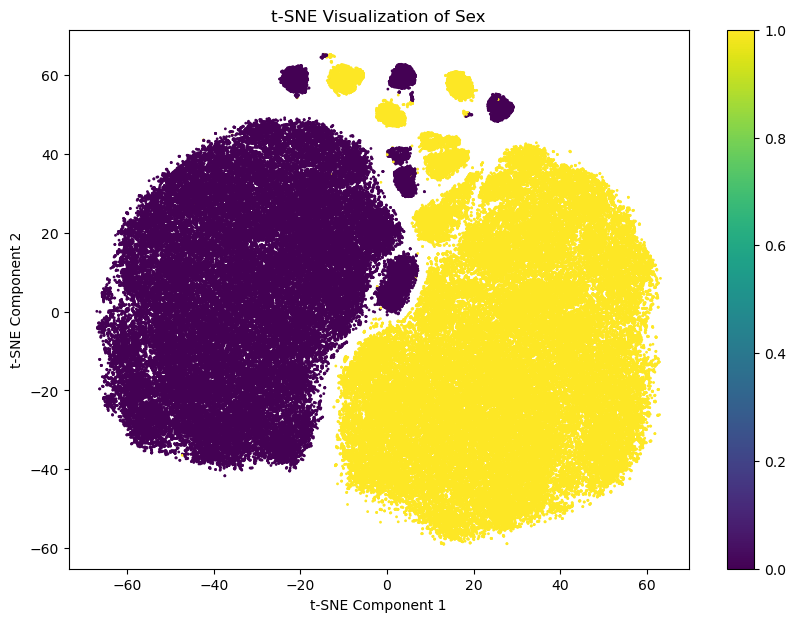

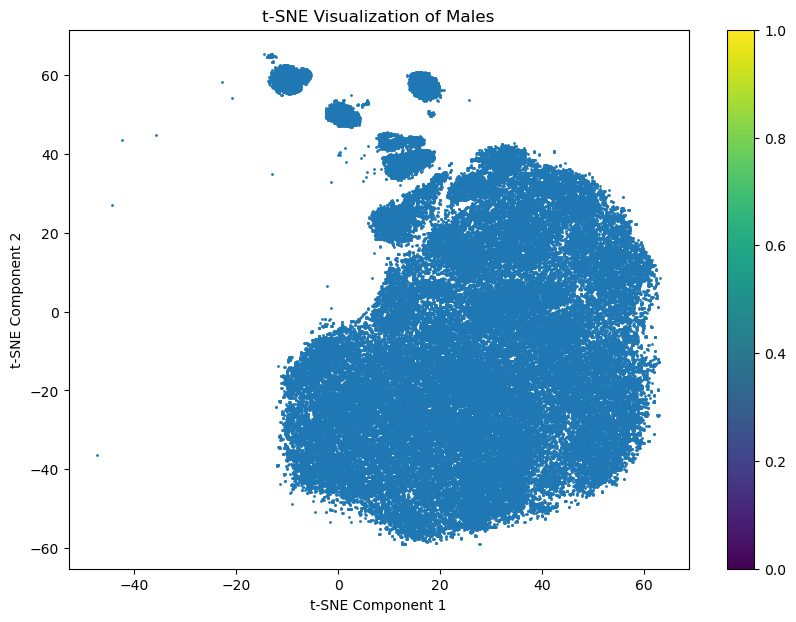

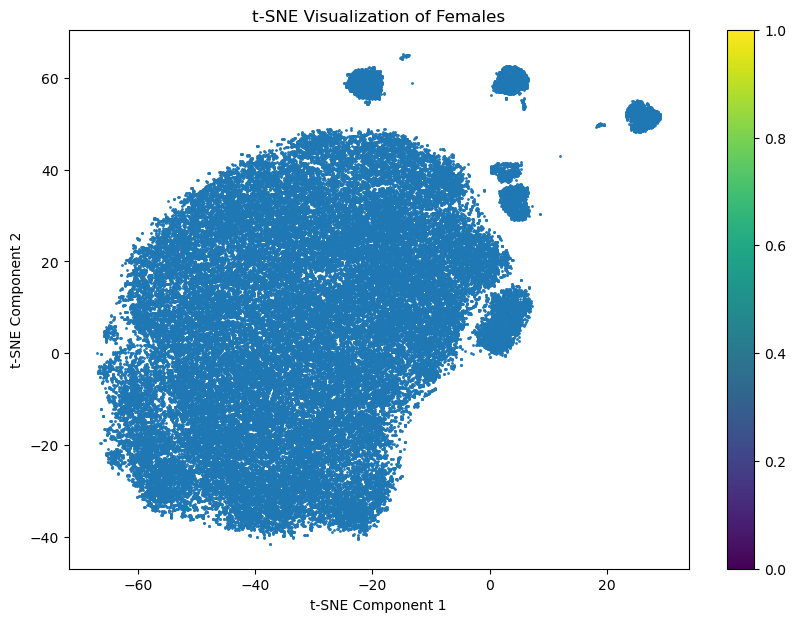

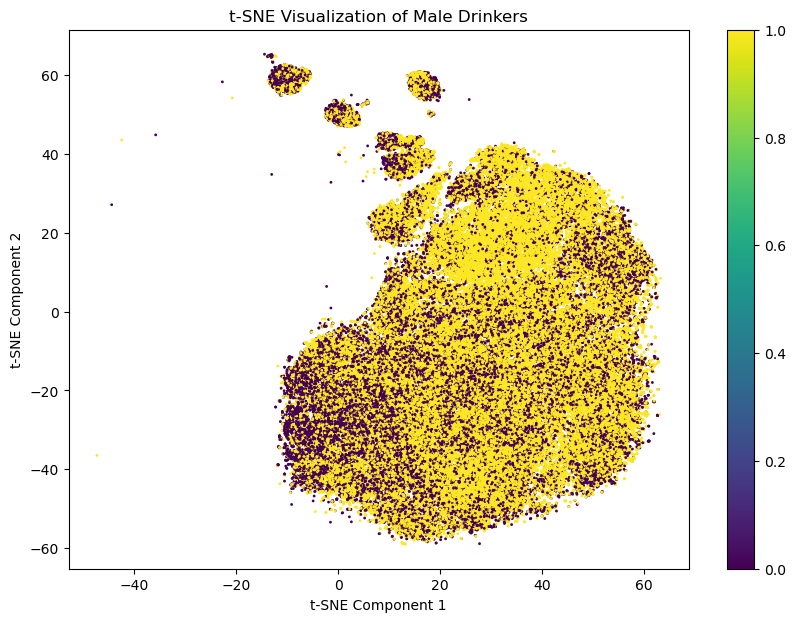

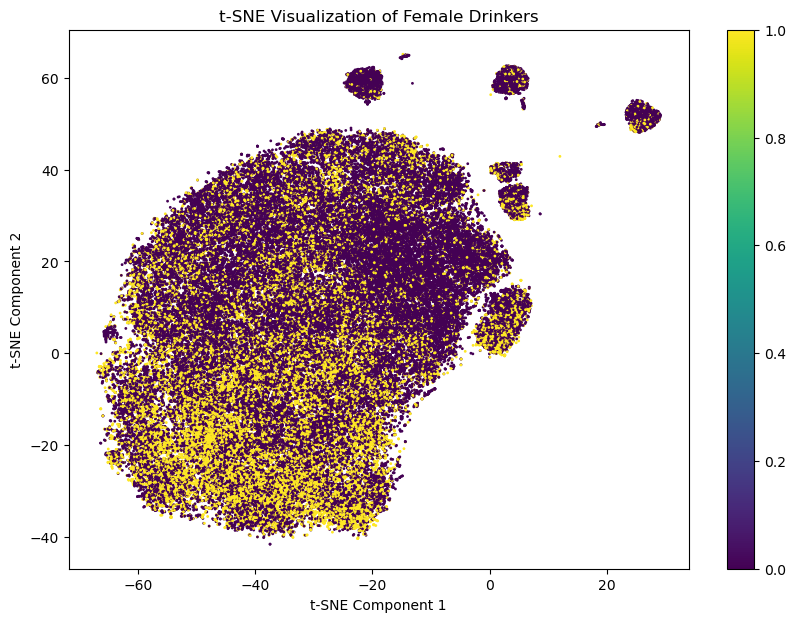

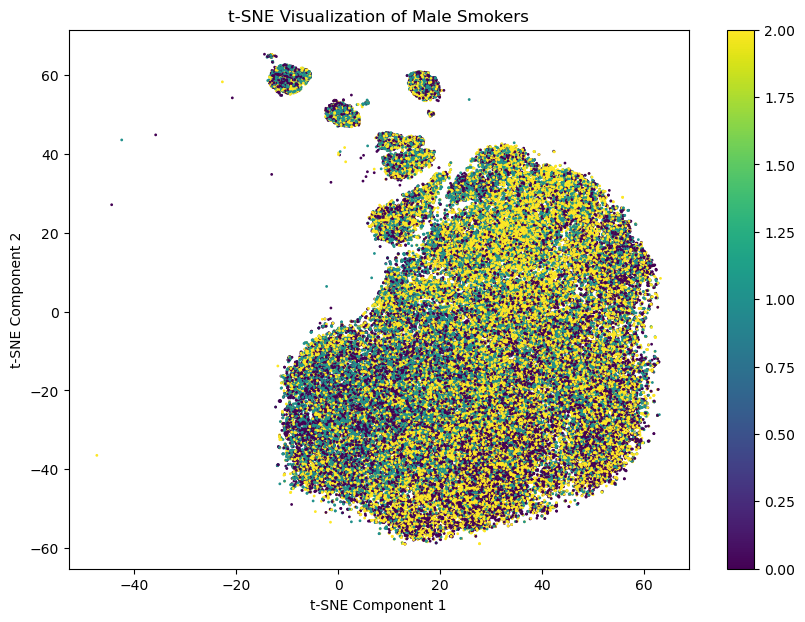

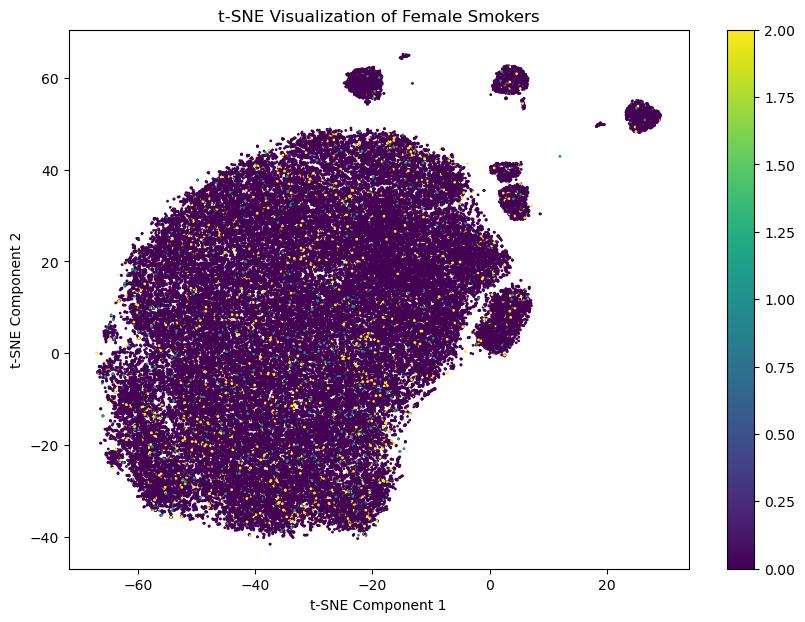

In [113]:
plt.figure(figsize=(10, 7))
plt.scatter(X_opentsne[:, 0], X_opentsne[:, 1], s=1, cmap='viridis', c=sex[:200000])
plt.title('t-SNE Visualization of Sex')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(X_opentsne_male[:, 0], X_opentsne_male[:, 1], s=1, cmap='viridis')
plt.title('t-SNE Visualization of Males')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(X_opentsne_female[:, 0], X_opentsne_female[:, 1], s=1, cmap='viridis')
plt.title('t-SNE Visualization of Females')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(X_opentsne_male[:, 0], X_opentsne_male[:, 1], s=1, cmap='viridis', c=DRK_subset_males)
plt.title('t-SNE Visualization of Male Drinkers')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(X_opentsne_female[:, 0], X_opentsne_female[:, 1], s=1, cmap='viridis', c=DRK_subset_females)
plt.title('t-SNE Visualization of Female Drinkers')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(X_opentsne_male[:, 0], X_opentsne_male[:, 1], s=1, cmap='viridis', c=SMK_subset_males)
plt.title('t-SNE Visualization of Male Smokers')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(X_opentsne_female[:, 0], X_opentsne_female[:, 1], s=1, cmap='viridis', c=SMK_subset_females)
plt.title('t-SNE Visualization of Female Smokers')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()

## k-Means Elbow Plot

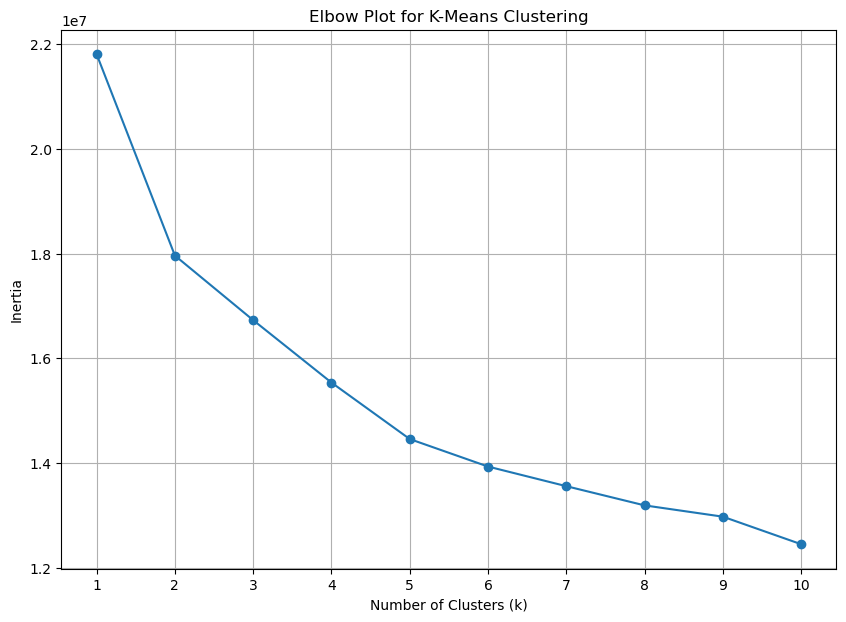

In [6]:
k_values = range(1, 11)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=69)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 7))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Plot for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

## K-Means with n = 2

In [114]:
kmeans = KMeans(n_clusters=2, random_state=69)
kmeans.fit(X)
kmeans_labels = kmeans.labels_
kmeans_centroids = kmeans.cluster_centers_

kmeans_labels_male = sex * kmeans.labels_
kmeans_labels_female = flipped_sex * kmeans.labels_

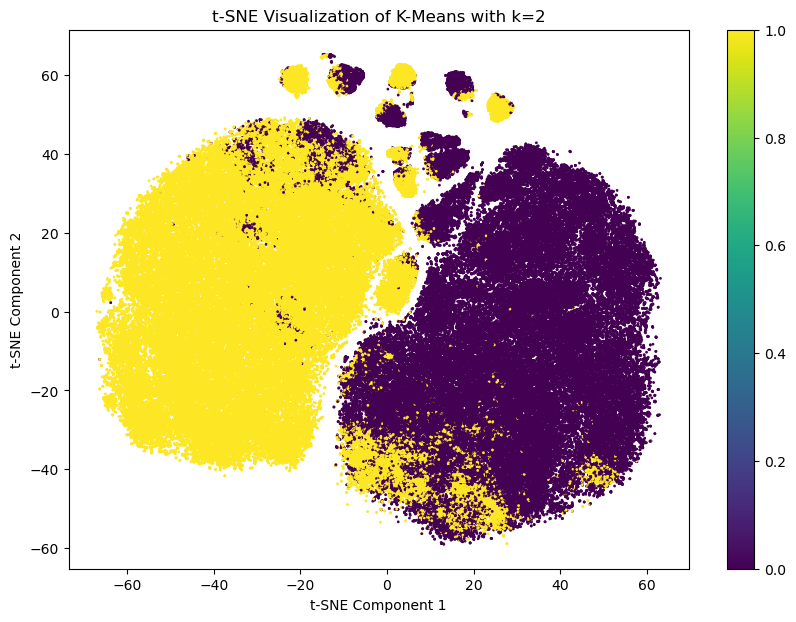

In [115]:
plt.figure(figsize=(10, 7))
plt.scatter(X_opentsne[:, 0], X_opentsne[:, 1], s=1, cmap='viridis', c=kmeans_labels[:200000])
plt.title('t-SNE Visualization of K-Means with k=2')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()

## K-Means with k = 5

In [116]:
kmeans = KMeans(n_clusters=5, random_state=69)
kmeans.fit(X)
kmeans_labels = kmeans.labels_
kmeans_centroids = kmeans.cluster_centers_

kmeans_labels_male = sex * kmeans.labels_
kmeans_labels_female = flipped_sex * kmeans.labels_

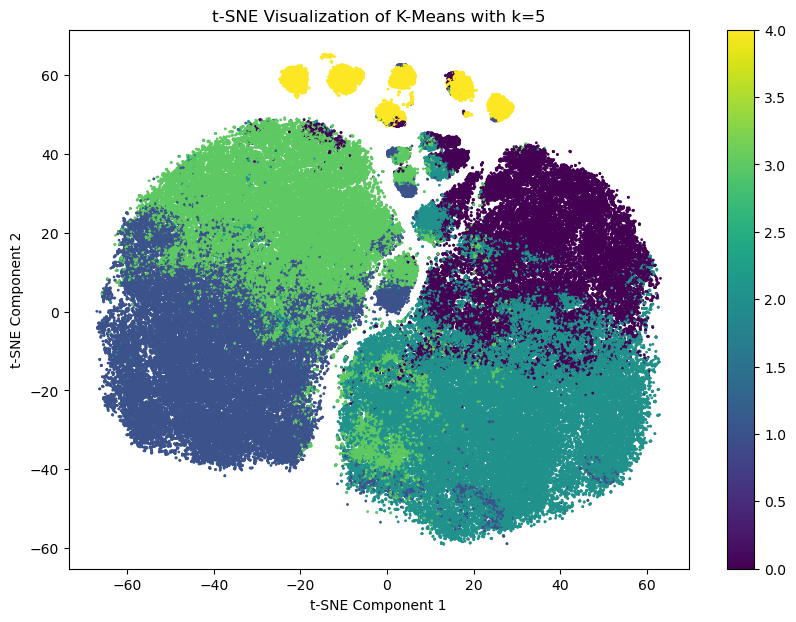

In [117]:
plt.figure(figsize=(10, 7))
plt.scatter(X_opentsne[:, 0], X_opentsne[:, 1], s=1, cmap='viridis', c=kmeans_labels[:200000])
plt.title('t-SNE Visualization of K-Means with k=5')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()

## DBSCAN todo

In [ ]:
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca[:200000])

In [12]:
np.unique(dbscan_labels)

array([-1,  0])

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_opentsne[:, 0], X_opentsne[:, 1], s=1, cmap='viridis', c=dbscan_labels[:200000])
plt.title('t-SNE Visualization of DBCSAN with eps = 1')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()

## GMM with n = 2

In [17]:
# Using original dataset
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X)

gmm_labels = (1 - gmm.predict(X))

np.unique(gmm_labels)

array([0, 1])

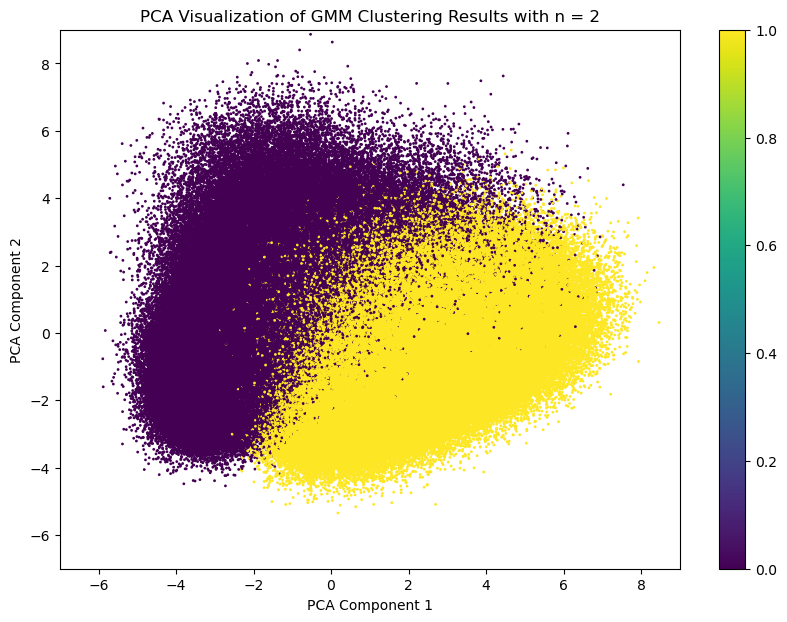

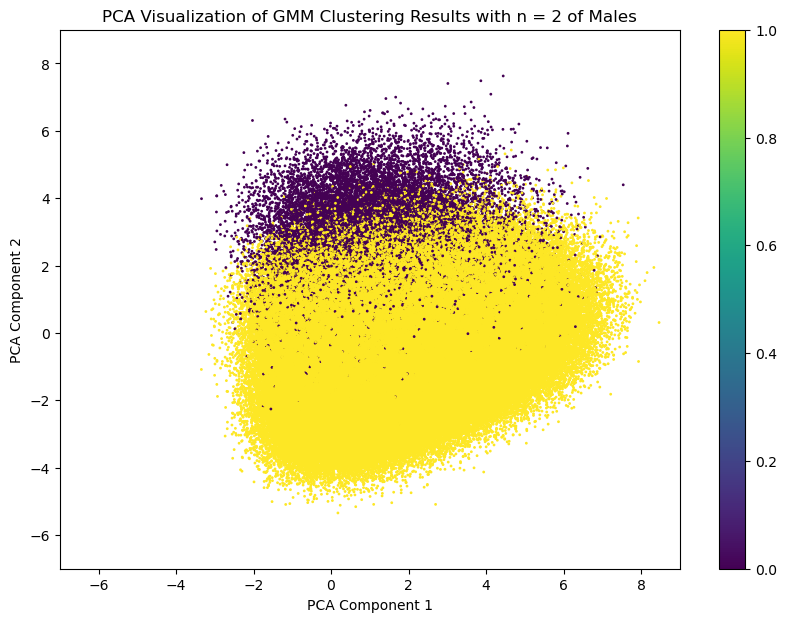

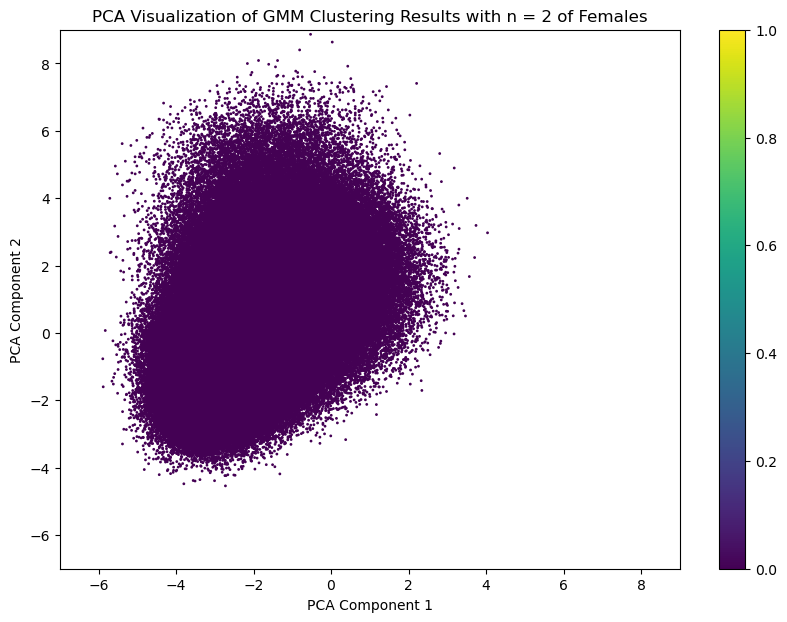

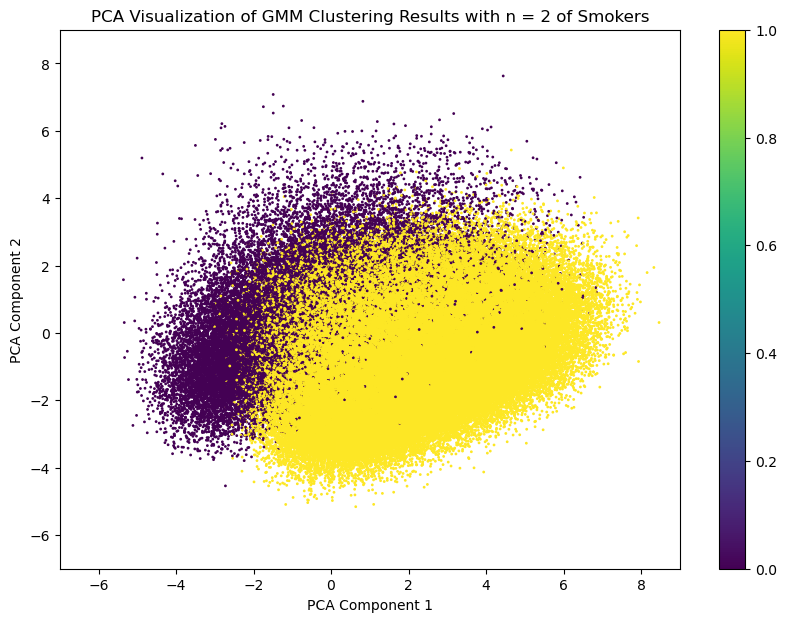

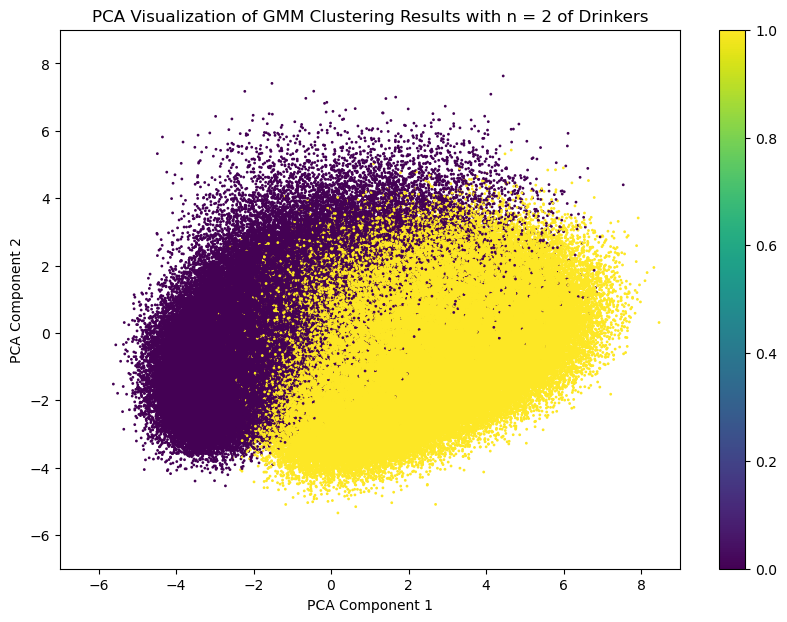

In [21]:
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=1, cmap='viridis', c=gmm_labels, vmin=0, vmax=1)
plt.title('PCA Visualization of GMM Clustering Results with n = 2')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.xlim(-7, 9)
plt.ylim(-7, 9)
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0][sex == 1], X_pca[:, 1][sex == 1], s=1, cmap='viridis', c=gmm_labels[sex == 1], vmin=0, vmax=1)
plt.title('PCA Visualization of GMM Clustering Results with n = 2 of Males')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.xlim(-7, 9)
plt.ylim(-7, 9)
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0][sex == 0], X_pca[:, 1][sex == 0], s=1, cmap='viridis', c=gmm_labels[sex == 0], vmin=0, vmax=1)
plt.title('PCA Visualization of GMM Clustering Results with n = 2 of Females')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.xlim(-7, 9)
plt.ylim(-7, 9)
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0][SMK == 2], X_pca[:, 1][SMK == 2], s=1, cmap='viridis', c=gmm_labels[SMK == 2], vmin=0, vmax=1)
plt.title('PCA Visualization of GMM Clustering Results with n = 2 of Smokers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.xlim(-7, 9)
plt.ylim(-7, 9)
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0][DRK == 1], X_pca[:, 1][DRK == 1], s=1, cmap='viridis', c=gmm_labels[DRK == 1], vmin=0, vmax=1)
plt.title('PCA Visualization of GMM Clustering Results with n = 2 of Drinkers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.xlim(-7, 9)
plt.ylim(-7, 9)
plt.colorbar()
plt.show()

## GMM with n = 5

In [15]:
# Using PCA dataset
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X)

gmm_labels = (1 - gmm.predict(X))

np.unique(gmm_labels)

array([-3, -2, -1,  0,  1])

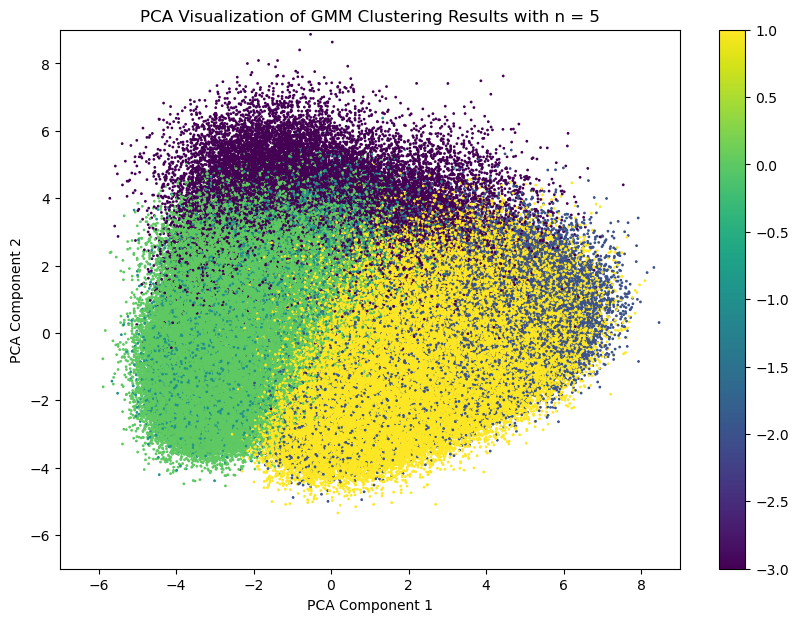

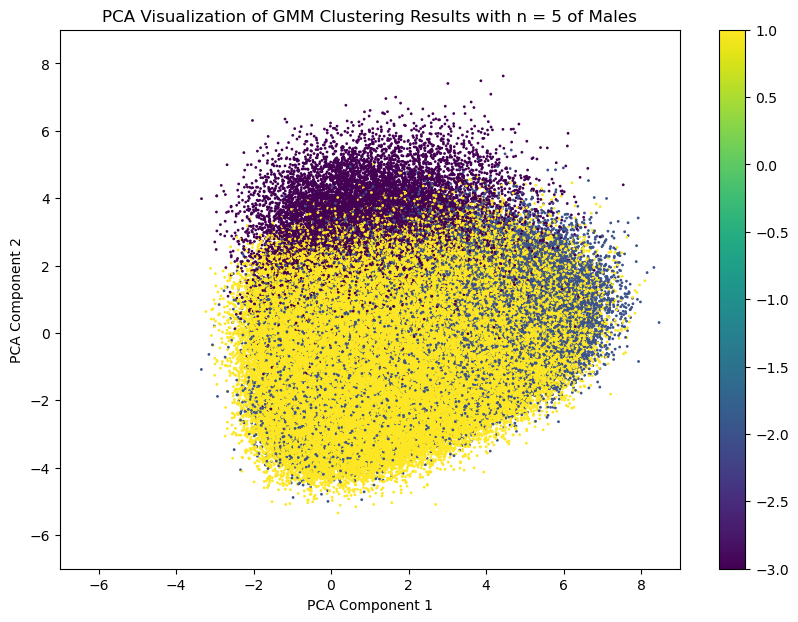

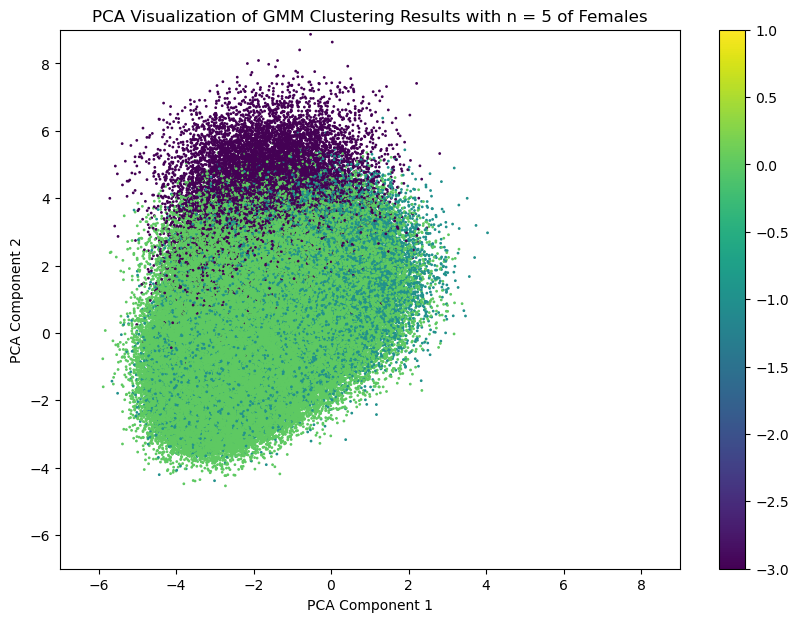

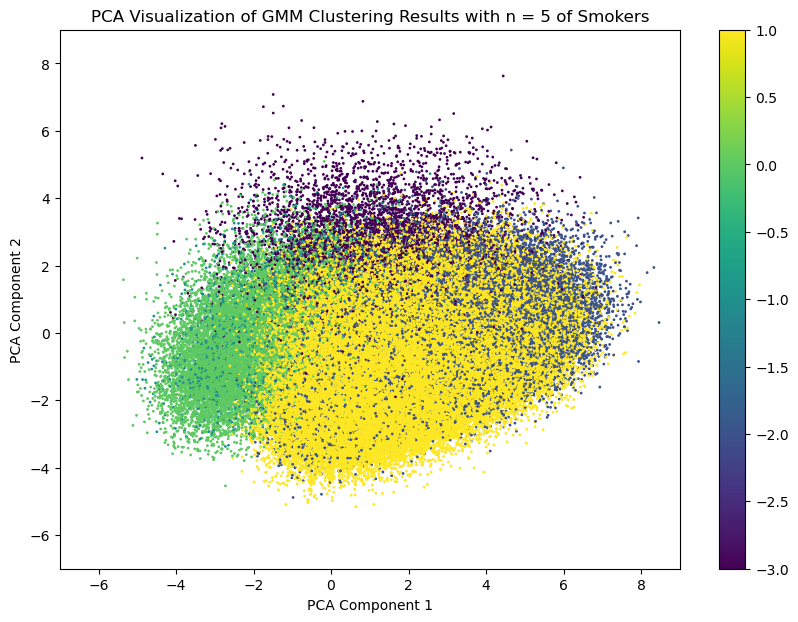

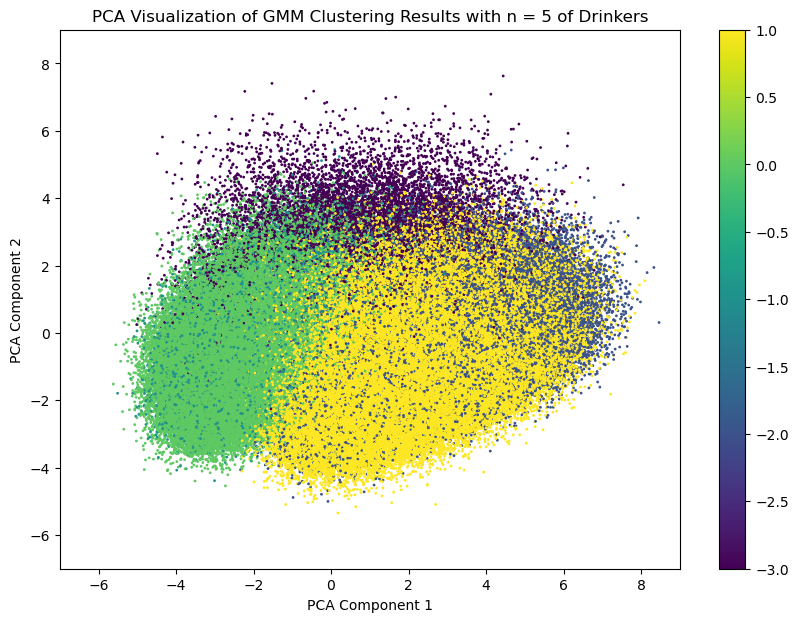

In [16]:
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=1, cmap='viridis', c=gmm_labels, vmin=-3, vmax=1)
plt.title('PCA Visualization of GMM Clustering Results with n = 5')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.xlim(-7, 9)
plt.ylim(-7, 9)
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0][sex == 1], X_pca[:, 1][sex == 1], s=1, cmap='viridis', c=gmm_labels[sex == 1], vmin=-3, vmax=1)
plt.title('PCA Visualization of GMM Clustering Results with n = 5 of Males')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.xlim(-7, 9)
plt.ylim(-7, 9)
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0][sex == 0], X_pca[:, 1][sex == 0], s=1, cmap='viridis', c=gmm_labels[sex == 0], vmin=-3, vmax=1)
plt.title('PCA Visualization of GMM Clustering Results with n = 5 of Females')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.xlim(-7, 9)
plt.ylim(-7, 9)
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0][SMK == 2], X_pca[:, 1][SMK == 2], s=1, cmap='viridis', c=gmm_labels[SMK == 2], vmin=-3, vmax=1)
plt.title('PCA Visualization of GMM Clustering Results with n = 5 of Smokers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.xlim(-7, 9)
plt.ylim(-7, 9)
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0][DRK == 1], X_pca[:, 1][DRK == 1], s=1, cmap='viridis', c=gmm_labels[DRK == 1], vmin=-3, vmax=1)
plt.title('PCA Visualization of GMM Clustering Results with n = 5 of Drinkers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.xlim(-7, 9)
plt.ylim(-7, 9)
plt.colorbar()
plt.show()